In [ ]:
!pip install jupyterthemes
!pip install --upgrade jupyterthemes

In [14]:
!pip install --upgrade pip

DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

In [15]:
!pip install -U seaborn

DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

In [ ]:
!pip install linearmodels

In [ ]:
!pip install statsmodels 

In [24]:
!pip install -U xlrd

DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

In [27]:
import pandas as pd
import numpy as np
import os
import pip
pip.main(['install','seaborn', 'xlrd'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


0

In [28]:
import xlrd

In [29]:
import seaborn as sns

In [83]:
dr = "/Users/shritej/Documents/GitHub/Econometrics/Econometrics/data/"

crrptn = pd.read_excel(dr+"Corruption.xls", sheet_name = "Data")
crrptn.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Last Updated Date,2022-09-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2012.000000,2013.000000,2014.000000,2015.0,2016.0,2017.000000,2018.0,2019.0,2020.0,2021.000000
3,Aruba,ABW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,2.578947,2.526316,2.555556,2.5,2.5,2.421053,2.5,2.5,2.5,2.473684


In [84]:
crrptn.shape

(269, 66)

In [85]:
crrptn.iloc[2]


Data Source                       Country Name
World Development Indicators      Country Code
Unnamed: 2                      Indicator Name
Unnamed: 3                      Indicator Code
Unnamed: 4                              1960.0
                                     ...      
Unnamed: 61                             2017.0
Unnamed: 62                             2018.0
Unnamed: 63                             2019.0
Unnamed: 64                             2020.0
Unnamed: 65                             2021.0
Name: 2, Length: 66, dtype: object

In [86]:
crrptn.loc[:,"Unnamed: 44"]

0         NaN
1         NaN
2      2000.0
3         NaN
4         NaN
        ...  
264       NaN
265       NaN
266       NaN
267       NaN
268       NaN
Name: Unnamed: 44, Length: 269, dtype: float64

In [87]:
drp_col = ["Unnamed: "+ str(i) for i in range(4, 44)]
drp_col.extend(['Unnamed: 65', 'Unnamed: 64'])

print(drp_col)
crp_drpcol = crrptn.drop(columns = drp_col )
crp_drpcol

['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 65', 'Unnamed: 64']


,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Last Updated Date,2022-09-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.000000,...,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.0,2016.0,2017.000000,2018.0,2019.0
3,Aruba,ABW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,2.805556,...,2.555556,2.611111,2.578947,2.526316,2.555556,2.5,2.5,2.421053,2.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.000000,3.0,3.0
265,"Yemen, Rep.",YEM,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,3.000000,...,2.500000,2.500000,2.000000,2.000000,2.000000,1.5,1.5,1.500000,1.5,1.5
266,South Africa,ZAF,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Zambia,ZMB,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,3.000000,...,2.500000,2.500000,3.000000,3.000000,3.000000,3.0,3.0,3.000000,2.5,2.5


In [88]:
crp = crp_drpcol.iloc[2:, ]
crp

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
2,Country Name,Country Code,Indicator Name,Indicator Code,2000.0,2001.0,2002.0,2003.0,2004.0,2005.000000,...,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.0,2016.00,2017.000000,2018.0,2019.000
3,Aruba,ABW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,2.805556,...,2.555556,2.611111,2.578947,2.526316,2.555556,2.5,2.50,2.421053,2.5,2.500
5,Afghanistan,AFG,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.00,2.000000,2.0,2.000
6,Africa Western and Central,AFW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,2.789474,...,2.850000,2.925000,2.825000,2.875000,2.900000,2.9,2.85,2.875000,2.9,2.925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.00,3.000000,3.0,3.000
265,"Yemen, Rep.",YEM,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,3.000000,...,2.500000,2.500000,2.000000,2.000000,2.000000,1.5,1.50,1.500000,1.5,1.500
266,South Africa,ZAF,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Zambia,ZMB,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,3.000000,...,2.500000,2.500000,3.000000,3.000000,3.000000,3.0,3.00,3.000000,2.5,2.500


In [89]:
crp.iloc[0]

Data Source                       Country Name
World Development Indicators      Country Code
Unnamed: 2                      Indicator Name
Unnamed: 3                      Indicator Code
Unnamed: 44                             2000.0
Unnamed: 45                             2001.0
Unnamed: 46                             2002.0
Unnamed: 47                             2003.0
Unnamed: 48                             2004.0
Unnamed: 49                             2005.0
Unnamed: 50                             2006.0
Unnamed: 51                             2007.0
Unnamed: 52                             2008.0
Unnamed: 53                             2009.0
Unnamed: 54                             2010.0
Unnamed: 55                             2011.0
Unnamed: 56                             2012.0
Unnamed: 57                             2013.0
Unnamed: 58                             2014.0
Unnamed: 59                             2015.0
Unnamed: 60                             2016.0
Unnamed: 61  

In [90]:
col = []
for i in range(crp.shape[1]):
    if i < 4:
        col.append(crp.iloc[0,i])
    else:
        col.append(int(crp.iloc[0,i]))
        
        
crp.columns = col
crp_df = crp.drop(index = [2])
crp_df.reset_index()
crp_df

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,Aruba,ABW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,2.805556,...,2.555556,2.611111,2.578947,2.526316,2.555556,2.5,2.50,2.421053,2.5,2.500
5,Afghanistan,AFG,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.00,2.000000,2.0,2.000
6,Africa Western and Central,AFW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,2.789474,...,2.850000,2.925000,2.825000,2.875000,2.900000,2.9,2.85,2.875000,2.9,2.925
7,Angola,AGO,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,2.500000,...,2.500000,2.500000,2.500000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Kosovo,XKX,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.00,3.000000,3.0,3.000
265,"Yemen, Rep.",YEM,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,3.000000,...,2.500000,2.500000,2.000000,2.000000,2.000000,1.5,1.50,1.500000,1.5,1.500
266,South Africa,ZAF,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Zambia,ZMB,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,3.000000,...,2.500000,2.500000,3.000000,3.000000,3.000000,3.0,3.00,3.000000,2.5,2.500


In [94]:
gdp = pd.read_csv(dr+"gdp21_region.csv")
safr = gdp.loc[#gdp['Region'] == "Sub-Saharan Africa" 
    :,
    ["Country Name", "Country Code", "Region", "IncomeGroup", "2021"]].sort_values(['2021'], ascending = True).dropna()
afr = safr.loc[:, "Country Code"].tolist()
cont_names = safr.loc[:, "Country Name"].tolist()
print(safr.shape)
print(safr.head())
print(afr)
print(cont_names)

(178, 5)
               Country Name Country Code              Region IncomeGroup   
0                   Burundi          BDI  Sub-Saharan Africa  Low income  \
1                   Somalia          SOM  Sub-Saharan Africa  Low income   
2                Mozambique          MOZ  Sub-Saharan Africa  Low income   
3  Central African Republic          CAF  Sub-Saharan Africa  Low income   
4                Madagascar          MDG  Sub-Saharan Africa  Low income   

         2021  
0  236.795414  
1  445.779017  
2  500.444809  
3  511.484746  
4  514.905862  
['BDI', 'SOM', 'MOZ', 'CAF', 'MDG', 'SLE', 'COD', 'NER', 'MWI', 'LBR', 'YEM', 'TCD', 'SDN', 'GNB', 'RWA', 'GMB', 'UGA', 'TJK', 'MLI', 'BFA', 'ETH', 'TGO', 'ZMB', 'TZA', 'LSO', 'GIN', 'MMR', 'NPL', 'KGZ', 'BEN', 'TLS', 'COM', 'PAK', 'KHM', 'SEN', 'CMR', 'MRT', 'ZWE', 'HTI', 'UZB', 'KEN', 'NGA', 'NIC', 'AGO', 'COG', 'IND', 'SLB', 'GHA', 'BGD', 'LAO', 'LBN', 'HND', 'PNG', 'VUT', 'DJI', 'BOL', 'CPV', 'FSM', 'MAR', 'PHL', 'PSE', 'VNM', 'DZ

In [96]:
gdp.head()

,Country Name,Country Code,Region,IncomeGroup,2021
0,Burundi,BDI,Sub-Saharan Africa,Low income,236.795414
1,Somalia,SOM,Sub-Saharan Africa,Low income,445.779017
2,Mozambique,MOZ,Sub-Saharan Africa,Low income,500.444809
3,Central African Republic,CAF,Sub-Saharan Africa,Low income,511.484746
4,Madagascar,MDG,Sub-Saharan Africa,Low income,514.905862


In [ ]:
gdp.dropna(inplace = True)
print(gdp.shape)
print(gdp)
#countries = gdp.loc[gdp['Region'] == "Sub-Saharan Africa", 'Country Code']

countries = gdp.loc[:, 'Country Code']

In [81]:
gdp['Region'].value_counts()

Region
Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: count, dtype: int64

In [39]:
meta = pd.read_excel(dr+"Corruption.xls", sheet_name = "Metadata - Countries")
countries = meta.loc[meta['Region'] == "Sub-Saharan Africa", 'Country Code']
print(len(countries))
print(countries)

48
4      AGO
16     BDI
18     BEN
19     BFA
33     BWA
34     CAF
41     CIV
42     CMR
43     COD
44     COG
46     COM
47     CPV
69     ERI
72     ETH
80     GAB
83     GHA
85     GIN
86     GMB
87     GNB
88     GNQ
120    KEN
130    LBR
140    LSO
150    MDG
157    MLI
164    MOZ
165    MRT
166    MUS
167    MWI
170    NAM
172    NER
173    NGA
202    RWA
205    SDN
206    SEN
209    SLE
212    SOM
215    SSD
218    STP
223    SWZ
225    SYC
228    TCD
231    TGO
245    TZA
246    UGA
262    ZAF
263    ZMB
264    ZWE
Name: Country Code, dtype: object


In [44]:
print(afr)
col_list = crp_df.columns
print(col_list)

['BDI', 'SOM', 'MOZ', 'CAF', 'MDG', 'SLE', 'COD', 'NER', 'MWI', 'LBR', 'TCD', 'SDN', 'GNB', 'RWA', 'GMB', 'UGA', 'MLI', 'BFA', 'ETH', 'TGO', 'ZMB', 'TZA', 'LSO', 'GIN', 'BEN', 'COM', 'SEN', 'CMR', 'MRT', 'ZWE', 'KEN', 'NGA', 'AGO', 'COG', 'GHA', 'CPV', 'SWZ', 'NAM', 'ZAF', 'BWA', 'GAB', 'GNQ', 'MUS', 'SYC']
Index([  'Country Name',   'Country Code', 'Indicator Name', 'Indicator Code',
                   2000,             2001,             2002,             2003,
                   2004,             2005,             2006,             2007,
                   2008,             2009,             2010,             2011,
                   2012,             2013,             2014,             2015,
                   2016,             2017,             2018,             2019],
      dtype='object')


In [46]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name: 'Hashable' = 'value', col_level=None, ignore_index: 'bool' = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it use

In [95]:
col_list = crp_df.columns
ind = "Corruption"
crp_afr_df = crp_df#.loc[crp_df['Country Code'].isin(afr)]
crp_fdf = pd.melt(crp_afr_df, id_vars = col_list[:4], value_vars = col_list[4:], var_name = "Year", value_name = ind)
crp_fdf

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Corruption
0,Aruba,ABW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2000,NaN
1,Africa Eastern and Southern,AFE,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2000,NaN
2,Afghanistan,AFG,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2000,NaN
3,Africa Western and Central,AFW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2000,NaN
4,Angola,AGO,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2000,NaN
...,...,...,...,...,...,...
5315,Kosovo,XKX,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2019,3.0
5316,"Yemen, Rep.",YEM,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2019,1.5
5317,South Africa,ZAF,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2019,NaN
5318,Zambia,ZMB,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,2019,2.5


In [48]:

crp_fdf.rename(columns = {'value':ind}, inplace = True )
crp_fdf.drop(columns = ["Indicator Name",	"Indicator Code"], inplace = True)
crp_fdf


,Country Name,Country Code,Year,Corruption
0,Angola,AGO,2000,NaN
1,Burundi,BDI,2000,NaN
2,Benin,BEN,2000,NaN
3,Burkina Faso,BFA,2000,NaN
4,Botswana,BWA,2000,NaN
...,...,...,...,...
875,Tanzania,TZA,2019,3.0
876,Uganda,UGA,2019,2.5
877,South Africa,ZAF,2019,NaN
878,Zambia,ZMB,2019,2.5


In [49]:
files = os.listdir(dr)
print(files)

['Prevelance of Undernourishment.xls', 'CO2.xls', '.DS_Store', 'Health Expenditure %.xls', 'gdp21_region.csv', 'Life Expectancy World Bank.xls', 'Education Expenditure %.xls', 'Unemployment.xls', 'Corruption.xls', 'Sanitation.xls']


In [50]:
sd = 'Prevelance of Undernourishment.xls'
s = sd.split('.')
s

['Prevelance of Undernourishment', 'xls']

In [102]:
dis_df = pd.read_csv(dr+'total-disease-burden-by-cause.csv')
dis_afr_df = dis_df.loc[#(dis_df['Code'].isin(afr)) & 
                        (dis_df['Year'].isin(list(range(2000, 2020)))), :].reset_index(drop = True)
dis_afr_df

,Entity,Code,Year,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,2000,2127069.68,9753355.99,5695785.39
1,Afghanistan,AFG,2001,2179727.10,9689193.70,5795426.38
2,Afghanistan,AFG,2002,1946983.65,9858324.98,5871595.71
3,Afghanistan,AFG,2003,1992263.52,9157600.44,6166298.79
4,Afghanistan,AFG,2004,2050765.02,8791000.56,6315336.43
...,...,...,...,...,...,...
4555,Zimbabwe,ZWE,2015,558777.68,4914787.34,2183134.86
4556,Zimbabwe,ZWE,2016,576934.87,4705251.43,2231062.45
4557,Zimbabwe,ZWE,2017,602042.89,4521261.68,2272515.94
4558,Zimbabwe,ZWE,2018,595808.24,4303993.57,2314452.55


In [114]:
len(dis_afr_df['Code'].unique())

206

In [ ]:
educ = pd.read_csv(dr+"total-government-expenditure-on-education-gdp.csv")
educ_df = educ.loc[(educ['Code'].isin(afr)) & (educ['Year'].isin([x for x in range(2000, 2020)])), :].reset_index(drop = True)
educ_df

In [ ]:
print(len(cont))
cont


## Looping all the Indicators XLS file 

In [144]:
gdp = pd.read_csv(dr+"gdp21_region.csv")
safr = gdp.loc[gdp['Region'] == "Sub-Saharan Africa",["Country Name", "Country Code", "Region", "IncomeGroup", "2021"]].sort_values(['2021'], ascending = True).dropna()
afr = safr.loc[:, "Country Code"].tolist()
dis_df = pd.read_csv(dr+'total-disease-burden-by-cause.csv')

In [56]:
files = os.listdir(dr)
print(files)

['Prevelance of Undernourishment.xls', 'CO2.xls', '.DS_Store', 'Health Expenditure %.xls', 'gdp21_region.csv', 'Life Expectancy World Bank.xls', 'Education Expenditure %.xls', 'Unemployment.xls', 'total-disease-burden-by-cause.csv', 'Corruption.xls', 'Sanitation.xls']


In [97]:
drp_col = ["Unnamed: "+ str(i) for i in range(4, 44)]
drp_col.extend(['Unnamed: 65', 'Unnamed: 64'])


for f in range(len(files)):
    print(f)
    fbr = files[f].split(".")
    if fbr[1] == 'xls':
        ind = fbr[0]
        ind_df = pd.read_excel(dr+files[f], sheet_name = "Data")
        df_drp = ind_df.drop(columns = drp_col )
        df_main = df_drp.iloc[2:, ]
        col = []
        for i in range(df_main.shape[1]):
            if i < 4:
                col.append(df_main.iloc[0,i])
            else:
                col.append(int(df_main.iloc[0,i]))


        df_main.columns = col
        df = df_main.drop(index = [2])
        df.reset_index()
        col_list = df.columns
        df_afr = df#.loc[crp_df['Country Code'].isin(afr)]
        dfi = pd.melt(df_afr, id_vars = col_list[:4], value_vars = col_list[4:], var_name = "Year")  
        dfi.rename(columns = {'value':ind}, inplace = True )
        dfi.drop(columns = ["Indicator Name",	"Indicator Code"], inplace = True)
        if f == 0: 
            df_real = dfi
            print(dfi)
        else: 
            df_real = pd.merge(df_real, dfi, on = ["Country Name", "Country Code", "Year"], how = 'inner')

df_real
        

0
                     Country Name Country Code  Year   
0                           Aruba          ABW  2000  \
1     Africa Eastern and Southern          AFE  2000   
2                     Afghanistan          AFG  2000   
3      Africa Western and Central          AFW  2000   
4                          Angola          AGO  2000   
...                           ...          ...   ...   
5315                       Kosovo          XKX  2019   
5316                  Yemen, Rep.          YEM  2019   
5317                 South Africa          ZAF  2019   
5318                       Zambia          ZMB  2019   
5319                     Zimbabwe          ZWE  2019   

      Prevelance of Undernourishment  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4                                NaN  
...                              ...  
5315                             NaN  
5316         

,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation
0,Aruba,ABW,2000,NaN,NaN,NaN,73.787000,4.71468,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,2000,NaN,355920.000000,6.252428,51.276129,3.76911,7.724844,NaN,NaN
2,Afghanistan,AFG,2000,NaN,760.000000,NaN,55.841000,NaN,10.806000,NaN,NaN
3,Africa Western and Central,AFW,2000,NaN,141740.000000,3.771302,49.219714,2.56502,4.921423,NaN,16.343739
4,Angola,AGO,2000,NaN,16200.000000,1.908599,46.522000,2.60753,4.030000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5295,Kosovo,XKX,2019,NaN,NaN,NaN,73.092683,NaN,NaN,3.0,NaN
5296,"Yemen, Rep.",YEM,2019,42.8,11100.000381,NaN,66.125000,NaN,13.056000,1.5,18.568462
5297,South Africa,ZAF,2019,6.3,439640.014648,9.109355,64.131000,5.91771,28.469999,NaN,NaN
5298,Zambia,ZMB,2019,NaN,6800.000191,5.312203,63.886000,4.46518,12.520000,2.5,NaN


In [113]:
df_real.shape

(5300, 11)

In [99]:
dfi.loc[dfi['Country Code'] == 'CMR', ]

,Country Name,Country Code,Year,Sanitation
42,Cameroon,CMR,2000,NaN
308,Cameroon,CMR,2001,NaN
574,Cameroon,CMR,2002,NaN
840,Cameroon,CMR,2003,NaN
1106,Cameroon,CMR,2004,NaN
1372,Cameroon,CMR,2005,NaN
1638,Cameroon,CMR,2006,NaN
1904,Cameroon,CMR,2007,NaN
2170,Cameroon,CMR,2008,NaN
2436,Cameroon,CMR,2009,NaN


In [61]:
df_master = pd.DataFrame(columns = ["Country Name", "Country Code", "Year"])


In [62]:
df_merge = pd.merge(crp_fdf, dfi, on = ["Country Name", "Country Code", "Year"], how = 'inner')
df_merge

,Country Name,Country Code,Year,Corruption,Sanitation
0,Angola,AGO,2000,NaN,NaN
1,Burundi,BDI,2000,NaN,NaN
2,Benin,BEN,2000,NaN,NaN
3,Burkina Faso,BFA,2000,NaN,NaN
4,Botswana,BWA,2000,NaN,NaN
...,...,...,...,...,...
875,Tanzania,TZA,2019,3.0,26.238278
876,Uganda,UGA,2019,2.5,NaN
877,South Africa,ZAF,2019,NaN,NaN
878,Zambia,ZMB,2019,2.5,NaN


In [100]:
dis_afr_df.head()

,Entity,Code,Year,Injuries,Communicable,NonCommunicable
0,Angola,AGO,2000,1395721.96,11185684.34,2602290.16
1,Angola,AGO,2001,1392080.71,11190210.53,2663516.34
2,Angola,AGO,2002,1218390.06,11126180.82,2725500.21
3,Angola,AGO,2003,1204475.81,11059687.49,2817017.06
4,Angola,AGO,2004,1272980.01,10920209.20,2951780.84


In [103]:
df_final = pd.merge(df_real, dis_afr_df, left_on = ["Country Name", "Country Code", "Year"], right_on= ['Entity','Code','Year'], how = 'inner')

df_final

,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,2000,NaN,760.000000,NaN,55.841,NaN,10.806000,NaN,NaN,Afghanistan,AFG,2127069.68,9753355.99,5695785.39
1,Angola,AGO,2000,NaN,16200.000000,1.908599,46.522,2.60753,4.030000,NaN,NaN,Angola,AGO,1395721.96,11185684.34,2602290.16
2,Albania,ALB,2000,NaN,3170.000000,7.233370,73.955,3.43017,19.028000,NaN,40.237416,Albania,ALB,126777.68,156542.64,539679.39
3,Andorra,AND,2000,NaN,520.000000,5.960511,NaN,NaN,NaN,NaN,14.604036,Andorra,AND,1697.06,695.40,13391.19
4,United Arab Emirates,ARE,2000,NaN,84730.000000,2.374135,74.327,NaN,2.250000,NaN,NaN,United Arab Emirates,ARE,137837.48,63472.78,458403.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,Vanuatu,VUT,2019,12.4,209.999993,3.360347,70.474,1.77788,1.801000,3.0,NaN,Vanuatu,VUT,12484.18,26032.56,69213.56
3476,Samoa,WSM,2019,4.4,300.000012,6.363094,73.321,4.70625,8.406000,4.0,47.698788,Samoa,WSM,6652.84,9095.19,43798.62
3477,South Africa,ZAF,2019,6.3,439640.014648,9.109355,64.131,5.91771,28.469999,NaN,NaN,South Africa,ZAF,3174676.10,13198944.71,10214261.89
3478,Zambia,ZMB,2019,NaN,6800.000191,5.312203,63.886,4.46518,12.520000,2.5,NaN,Zambia,ZMB,510982.75,4837094.00,2649687.82


In [104]:
df_final.drop('Year', axis =  1).isna().groupby(df_final.Year, sort=False).sum().reset_index()


,Year,Country Name,Country Code,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable
0,2000,0,0,174,8,12,8,71,16,174,69,0,0,0,0,0
1,2001,0,0,36,8,12,10,77,16,174,67,0,0,0,0,0
2,2002,0,0,36,8,11,9,69,16,174,66,0,0,0,0,0
3,2003,0,0,36,8,10,10,82,16,174,66,0,0,0,0,0
4,2004,0,0,36,8,10,10,71,16,174,66,0,0,0,0,0
5,2005,0,0,36,8,10,9,74,16,107,66,0,0,0,0,0
6,2006,0,0,36,8,10,10,77,16,106,65,0,0,0,0,0
7,2007,0,0,36,8,10,10,74,16,109,65,0,0,0,0,0
8,2008,0,0,36,8,10,10,63,16,109,65,0,0,0,0,0
9,2009,0,0,36,8,10,10,61,16,108,65,0,0,0,0,0


In [105]:
df_final


,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,2000,NaN,760.000000,NaN,55.841,NaN,10.806000,NaN,NaN,Afghanistan,AFG,2127069.68,9753355.99,5695785.39
1,Angola,AGO,2000,NaN,16200.000000,1.908599,46.522,2.60753,4.030000,NaN,NaN,Angola,AGO,1395721.96,11185684.34,2602290.16
2,Albania,ALB,2000,NaN,3170.000000,7.233370,73.955,3.43017,19.028000,NaN,40.237416,Albania,ALB,126777.68,156542.64,539679.39
3,Andorra,AND,2000,NaN,520.000000,5.960511,NaN,NaN,NaN,NaN,14.604036,Andorra,AND,1697.06,695.40,13391.19
4,United Arab Emirates,ARE,2000,NaN,84730.000000,2.374135,74.327,NaN,2.250000,NaN,NaN,United Arab Emirates,ARE,137837.48,63472.78,458403.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,Vanuatu,VUT,2019,12.4,209.999993,3.360347,70.474,1.77788,1.801000,3.0,NaN,Vanuatu,VUT,12484.18,26032.56,69213.56
3476,Samoa,WSM,2019,4.4,300.000012,6.363094,73.321,4.70625,8.406000,4.0,47.698788,Samoa,WSM,6652.84,9095.19,43798.62
3477,South Africa,ZAF,2019,6.3,439640.014648,9.109355,64.131,5.91771,28.469999,NaN,NaN,South Africa,ZAF,3174676.10,13198944.71,10214261.89
3478,Zambia,ZMB,2019,NaN,6800.000191,5.312203,63.886,4.46518,12.520000,2.5,NaN,Zambia,ZMB,510982.75,4837094.00,2649687.82


In [106]:
df_final.loc[df_final['Year'] == 2019]

,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable
3306,Afghanistan,AFG,2019,26.9,6079.999924,13.242202,64.833,3.213780,11.217000,2.0,NaN,Afghanistan,AFG,3481166.42,6034434.86,7601757.82
3307,Angola,AGO,2019,17.9,25209.999084,2.533360,61.147,1.927457,7.421000,NaN,NaN,Angola,AGO,1168866.00,7237433.13,4176568.27
3308,Albania,ALB,2019,4.3,4829.999924,NaN,78.573,3.916650,11.470000,NaN,47.577141,Albania,ALB,82288.10,51797.42,631629.88
3309,Andorra,AND,2019,NaN,500.000000,6.711585,NaN,3.150610,NaN,NaN,100.000004,Andorra,AND,2124.01,800.50,19002.03
3310,United Arab Emirates,ARE,2019,6.0,188860.000610,4.275049,77.972,3.867370,2.230000,NaN,99.147700,United Arab Emirates,ARE,382562.41,120204.51,1637717.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,Vanuatu,VUT,2019,12.4,209.999993,3.360347,70.474,1.777880,1.801000,3.0,NaN,Vanuatu,VUT,12484.18,26032.56,69213.56
3476,Samoa,WSM,2019,4.4,300.000012,6.363094,73.321,4.706250,8.406000,4.0,47.698788,Samoa,WSM,6652.84,9095.19,43798.62
3477,South Africa,ZAF,2019,6.3,439640.014648,9.109355,64.131,5.917710,28.469999,NaN,NaN,South Africa,ZAF,3174676.10,13198944.71,10214261.89
3478,Zambia,ZMB,2019,NaN,6800.000191,5.312203,63.886,4.465180,12.520000,2.5,NaN,Zambia,ZMB,510982.75,4837094.00,2649687.82


In [115]:
df_final.loc[df_final['Year'] == 2019, :].sort_values(['Life Expectancy World Bank'], ascending = False)

,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable
3386,Japan,JPN,2019,2.8,1.081570e+06,10.743725,84.356341,NaN,2.40,NaN,81.033795,Japan,JPN,3298052.16,2030122.25,31250149.03
3336,Switzerland,CHE,2019,2.5,3.738000e+04,11.291481,83.904878,NaN,4.39,NaN,99.638626,Switzerland,CHE,222902.14,84137.81,1937774.53
3354,Spain,ESP,2019,2.5,2.399800e+05,9.132132,83.831707,NaN,14.10,NaN,95.665499,Spain,ESP,923644.79,494856.88,11233598.70
3445,Singapore,SGP,2019,NaN,4.738000e+04,4.081529,83.595122,2.736210,3.10,NaN,100.000000,Singapore,SGP,91559.87,84309.18,871899.33
3383,Italy,ITA,2019,2.5,3.172400e+05,8.668569,83.497561,NaN,9.95,NaN,95.777033,Italy,ITA,1216149.04,552868.23,16313740.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Northern Mariana Islands,MNP,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Mariana Islands,MNP,1439.97,1172.51,12255.20
3426,Nauru,NRU,2019,NaN,6.000000e+01,9.781716,NaN,5.596538,NaN,NaN,NaN,Nauru,NRU,579.07,784.58,2498.80
3433,Palau,PLW,2019,NaN,2.500000e+02,15.150489,NaN,6.810000,NaN,NaN,NaN,Palau,PLW,1002.36,1030.22,6406.86
3449,San Marino,SMR,2019,NaN,NaN,6.390085,NaN,3.379700,NaN,NaN,70.371500,San Marino,SMR,757.62,357.19,8023.10


In [122]:
#df_final05 = df_final.loc[df_final['Year']> 2004, :]
df_final05 = df_final.loc[df_final['Year']> 2000, :]

In [117]:
df_na_cont = df_final05.drop('Country Name', axis = 1).isna().groupby(df_final05['Country Name'], sort=False).sum().reset_index()

In [118]:
df_na_cont

,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable
0,Afghanistan,0,0,0,0,1,0,4,0,5,19,0,0,0,0,0
1,Angola,0,0,0,0,0,0,4,0,10,19,0,0,0,0,0
2,Albania,0,0,0,0,1,0,4,0,17,0,0,0,0,0,0
3,Andorra,0,0,19,0,0,19,3,19,19,0,0,0,0,0,0
4,United Arab Emirates,0,0,0,0,0,0,18,0,19,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Vanuatu,0,0,0,0,0,0,10,0,4,19,0,0,0,0,0
170,Samoa,0,0,0,0,0,0,6,0,4,0,0,0,0,0,0
171,South Africa,0,0,0,0,0,0,0,0,19,19,0,0,0,0,0
172,Zambia,0,0,19,0,0,0,4,0,4,19,0,0,0,0,0


In [119]:
df_na_cont.loc[df_na_cont['Sanitation'] == 0 ].reset_index()

,index,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable
0,2,Albania,0,0,0,0,1,0,4,0,17,0,0,0,0,0,0
1,3,Andorra,0,0,19,0,0,19,3,19,19,0,0,0,0,0,0
2,6,Armenia,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0
3,9,Australia,0,0,0,0,0,0,5,0,19,0,0,0,0,0,0
4,10,Austria,0,0,0,0,0,0,1,0,19,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,162,Tanzania,0,0,0,0,0,0,3,0,4,0,0,0,0,0,0
99,164,Ukraine,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0
100,166,United States,0,0,0,0,0,0,15,0,19,0,0,0,0,0,0
101,170,Samoa,0,0,0,0,0,0,6,0,4,0,0,0,0,0,0


In [120]:
df_fil = df_na_cont.loc[(df_na_cont['Prevelance of Undernourishment'] == 0 ) & (df_na_cont['Corruption'] == 0) & (df_na_cont['Education Expenditure %'] <10)].reset_index()

cont = df_fil['Country Name'].tolist()
df_fil

,index,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable


In [121]:
df_ed_na = df_na_cont.loc[(df_na_cont['Education Expenditure %'] != 0 ) & (df_na_cont['Country Name'].isin(cont))].reset_index(drop = True)
cn_edna = df_ed_na['Country Name'].tolist()
print(cn_edna)

[]


In [125]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'MergeHow' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool | None' = None, indicator: 'str | bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    .. warning::
    
        If bo

In [146]:
gdp.head()
gdp_con = set(gdp['Country Name'].unique())
df_con = set(df_final05['Country Name'].unique())
print(len(gdp_con))
print(len(df_con))


print(len(df_con.difference(gdp_con)))
print(df_con.difference(gdp_con))



265
174
2
{'Sao Tome and Principe', "Cote d'Ivoire"}


In [138]:
gdp[gdp['Country Name'].isin(['Sao Tome and Principe', "Cote d'Ivoire"])]
df_final05[df_final05['Country Name'].isin(['Sao Tome and Principe', "Cote d'Ivoire"])].head()

,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable
207,Cote d'Ivoire,CIV,2001,20.4,6490.000000,6.017727,49.495,2.44477,4.795000,NaN,NaN,Cote d'Ivoire,CIV,657533.50,12911513.67,2791907.35
321,Sao Tome and Principe,STP,2001,14.7,50.000000,10.831803,62.017,NaN,15.730000,NaN,13.728401,Sao Tome and Principe,STP,3361.28,39262.77,24498.78
381,Cote d'Ivoire,CIV,2002,21.0,6840.000153,5.903909,49.475,2.81048,5.031000,NaN,NaN,Cote d'Ivoire,CIV,745148.93,12966203.76,2841395.04
495,Sao Tome and Principe,STP,2002,12.8,59.999999,10.662792,62.687,2.72058,17.629999,NaN,14.818670,Sao Tome and Principe,STP,3781.09,36011.64,25804.54
555,Cote d'Ivoire,CIV,2003,20.6,5309.999943,5.479770,49.572,2.86437,5.255000,NaN,NaN,Cote d'Ivoire,CIV,748034.58,13002141.98,2894474.23


In [145]:
gdp.head()

,Country Name,Country Code,Region,IncomeGroup,2021
0,Burundi,BDI,Sub-Saharan Africa,Low income,236.795414
1,Somalia,SOM,Sub-Saharan Africa,Low income,445.779017
2,Mozambique,MOZ,Sub-Saharan Africa,Low income,500.444809
3,Central African Republic,CAF,Sub-Saharan Africa,Low income,511.484746
4,Madagascar,MDG,Sub-Saharan Africa,Low income,514.905862


In [151]:
gdp['Region'].value_counts()

Region
Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: count, dtype: int64

In [148]:
final_df = pd.merge(df_final05, gdp.drop(columns = ['Country Name', '2021']) , how = 'left', on = 'Country Code')
print(final_df.shape)
final_df.head()

(3306, 18)


,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Sanitation,Entity,Code,Injuries,Communicable,NonCommunicable,Region,IncomeGroup
0,Afghanistan,AFG,2001,47.8,730.0,NaN,56.308,NaN,10.809000,NaN,NaN,Afghanistan,AFG,2179727.10,9689193.70,5795426.38,South Asia,Low income
1,Angola,AGO,2001,67.5,15960.0,4.483516,47.059,NaN,4.004000,NaN,NaN,Angola,AGO,1392080.71,11190210.53,2663516.34,Sub-Saharan Africa,Lower middle income
2,Albania,ALB,2001,4.9,3230.0,7.139524,74.288,3.4587,18.575001,NaN,40.520895,Albania,ALB,117081.67,140894.78,532324.75,Europe & Central Asia,Upper middle income
3,Andorra,AND,2001,NaN,520.0,5.865939,NaN,NaN,NaN,NaN,21.788660,Andorra,AND,1697.99,695.56,13636.64,Europe & Central Asia,High income
4,United Arab Emirates,ARE,2001,2.8,97200.0,2.484370,74.544,NaN,2.493000,NaN,NaN,United Arab Emirates,ARE,144678.14,65271.91,481740.70,Middle East & North Africa,High income


1247

In [150]:
final_df.columns
final_df = final_df[['Country Name', 'Country Code',  'Region', 'IncomeGroup', 'Year', 'Life Expectancy World Bank',
       'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %',
        'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Entity', 'Code', 'Injuries',
       'Communicable', 'NonCommunicable']]

In [ ]:
drop_cont = ['Seychelles', 'Equatorial Guinea'  ]

In [153]:
#df_final.drop(columns = ['Sanitation','Entity','Code'], inplace = True)
final_df.drop(columns = ['Entity','Code'], inplace = True)

In [80]:
df_final = df_final.loc[(df_final['Country Name'].isin(cont)) & (df_final['Year'] >= 2005), :]
df_final

,Country Name,Country Code,Year,Prevelance of Undernourishment,CO2,Health Expenditure %,Life Expectancy World Bank,Education Expenditure %,Unemployment,Corruption,Injuries,Communicable,NonCommunicable


In [154]:
final_df.to_csv(dr + 'final_df.csv', index = False)

In [ ]:
df_final.to_csv(dr + 'final_df.csv', index = False)

In [ ]:
df_final[df_final['Country Name'] == 'Mozambique']

In [ ]:
df_final2 = df_final.rename(columns = {"Prevelance of Undernourishment" : "Undernourishment", \
                           "Health Expenditure %": "Health", \
                          "Education Expenditure %" : "Educ", \
                          "Life Expectancy World Bank": "Y"})
df_final2['Educ'] = df_final2['Educ'].interpolate(method = 'linear')
df_final2[df_final2['Country Name'] == 'Mozambique']

In [ ]:
df_final2 = df_final.rename(columns = {"Prevelance of Undernourishment" : "Undernourishment", \
                           "Health Expenditure %": "Health", \
                          "Education Expenditure %" : "Educ", \
                          "Life Expectancy World Bank": "Y"})
df_final2['Educ'] = df_final2['Educ'].fillna(method ='bfill')
df_final2[df_final2['Country Name'] == 'Mozambique']

In [ ]:
code_name_dic = df_final2.groupby('Country Code')['Country Name'].unique().apply(list).to_dict()
code_name_dic


In [ ]:
lg_col = ['Injuries','Communicable','NonCommunicable','CO2' ]
for i in lg_col:
    df_final2['log_'+ i ] = np.log10(df_final2[i])


In [57]:
['df']+ ['s', 'f']

['df', 's', 'f']

In [ ]:
df_final2.isna().sum()

In [ ]:
df_final2.drop(columns = ['CO2', 'log_Injuries', 'log_NonCommunicable', 'Injuries','Communicable','NonCommunicable']).reset_index(drop = True)

In [ ]:
df_final2.to_csv(dr + 'df_final2.csv', index = False)

### Panel Data Preparation

In [18]:
df_final2 = pd.read_csv('df_final2.csv')
lg_col = ['Injuries','Communicable','NonCommunicable','CO2' ]
pdf = df_final2.set_index(keys = ['Country Code', "Year"]).drop(columns = ["Country Name"]+lg_col)
pdf


,,Undernourishment,Health,Y,Educ,Unemployment,Corruption,log_Injuries,log_Communicable,log_NonCommunicable,log_CO2
Country Code,Year,,,,,,,,,,
BEN,2005,12.0,2.934783,57.355,2.656680,0.825,3.5,5.496503,6.636944,6.118345,3.462398
BFA,2005,17.5,3.951091,53.310,3.941140,4.000,3.5,5.771901,7.000503,6.424960,3.025306
CAF,2005,39.6,4.367321,44.744,1.652220,5.695,2.5,5.491547,6.575926,5.905885,2.342423
CMR,2005,15.9,4.095445,52.760,2.656520,4.400,2.5,5.849013,7.037198,6.463379,3.700704
ETH,2005,37.1,4.100981,56.223,7.422080,2.500,2.5,6.491928,7.610563,7.041690,3.703291
...,...,...,...,...,...,...,...,...,...,...,...
SEN,2019,7.4,4.132269,67.941,5.348875,2.860,3.5,5.525028,6.465340,6.346181,4.026125
SLE,2019,27.9,8.749766,54.696,7.447010,4.649,3.0,5.463166,6.484336,6.146085,2.954242
TCD,2019,31.7,4.353631,54.239,2.372460,1.123,2.5,5.797074,6.929261,6.390883,3.352183


In [19]:
df_final2.head()

,Country Name,Country Code,Year,Undernourishment,CO2,Health,Y,Educ,Unemployment,Corruption,Injuries,Communicable,NonCommunicable,log_Injuries,log_Communicable,log_NonCommunicable,log_CO2
0,Benin,BEN,2005,12.0,2900.000095,2.934783,57.355,2.65668,0.825,3.5,313691.95,4334552.55,1313241.95,5.496503,6.636944,6.118345,3.462398
1,Burkina Faso,BFA,2005,17.5,1059.999943,3.951091,53.310,3.94114,4.000,3.5,591426.25,10011584.28,2660480.48,5.771901,7.000503,6.424960,3.025306
2,Central African Republic,CAF,2005,39.6,219.999999,4.367321,44.744,1.65222,5.695,2.5,310132.64,3766393.86,805165.65,5.491547,6.575926,5.905885,2.342423
3,Cameroon,CMR,2005,15.9,5019.999981,4.095445,52.760,2.65652,4.400,2.5,706338.00,10894276.03,2906555.32,5.849013,7.037198,6.463379,3.700704
4,Ethiopia,ETH,2005,37.1,5050.000191,4.100981,56.223,7.42208,2.500,2.5,3104046.10,40790843.51,11007525.30,6.491928,7.610563,7.041690,3.703291


In [20]:
years = pdf.index.get_level_values('Year').to_list()
pdf["Year"] = pd.Categorical(years)

In [21]:
pdf.drop(columns = ['log_NonCommunicable', 'log_Injuries'], inplace = True )
pdf

,,Undernourishment,Health,Y,Educ,Unemployment,Corruption,log_Communicable,log_CO2,Year
Country Code,Year,,,,,,,,,
BEN,2005,12.0,2.934783,57.355,2.656680,0.825,3.5,6.636944,3.462398,2005
BFA,2005,17.5,3.951091,53.310,3.941140,4.000,3.5,7.000503,3.025306,2005
CAF,2005,39.6,4.367321,44.744,1.652220,5.695,2.5,6.575926,2.342423,2005
CMR,2005,15.9,4.095445,52.760,2.656520,4.400,2.5,7.037198,3.700704,2005
ETH,2005,37.1,4.100981,56.223,7.422080,2.500,2.5,7.610563,3.703291,2005
...,...,...,...,...,...,...,...,...,...,...
SEN,2019,7.4,4.132269,67.941,5.348875,2.860,3.5,6.465340,4.026125,2019
SLE,2019,27.9,8.749766,54.696,7.447010,4.649,3.0,6.484336,2.954242,2019
TCD,2019,31.7,4.353631,54.239,2.372460,1.123,2.5,6.929261,3.352183,2019


## Panel Data Modelling

### Pooled OLS 

In [22]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm


In [23]:
pdf


,,Undernourishment,Health,Y,Educ,Unemployment,Corruption,log_Communicable,log_CO2,Year
Country Code,Year,,,,,,,,,
BEN,2005,12.0,2.934783,57.355,2.656680,0.825,3.5,6.636944,3.462398,2005
BFA,2005,17.5,3.951091,53.310,3.941140,4.000,3.5,7.000503,3.025306,2005
CAF,2005,39.6,4.367321,44.744,1.652220,5.695,2.5,6.575926,2.342423,2005
CMR,2005,15.9,4.095445,52.760,2.656520,4.400,2.5,7.037198,3.700704,2005
ETH,2005,37.1,4.100981,56.223,7.422080,2.500,2.5,7.610563,3.703291,2005
...,...,...,...,...,...,...,...,...,...,...
SEN,2019,7.4,4.132269,67.941,5.348875,2.860,3.5,6.465340,4.026125,2019
SLE,2019,27.9,8.749766,54.696,7.447010,4.649,3.0,6.484336,2.954242,2019
TCD,2019,31.7,4.353631,54.239,2.372460,1.123,2.5,6.929261,3.352183,2019


In [24]:
pdf[['Undernourishment','log_CO2','Health','Educ','Unemployment','Corruption','log_Communicable']]

,,Undernourishment,log_CO2,Health,Educ,Unemployment,Corruption,log_Communicable
Country Code,Year,,,,,,,
BEN,2005,12.0,3.462398,2.934783,2.656680,0.825,3.5,6.636944
BFA,2005,17.5,3.025306,3.951091,3.941140,4.000,3.5,7.000503
CAF,2005,39.6,2.342423,4.367321,1.652220,5.695,2.5,6.575926
CMR,2005,15.9,3.700704,4.095445,2.656520,4.400,2.5,7.037198
ETH,2005,37.1,3.703291,4.100981,7.422080,2.500,2.5,7.610563
...,...,...,...,...,...,...,...,...
SEN,2019,7.4,4.026125,4.132269,5.348875,2.860,3.5,6.465340
SLE,2019,27.9,2.954242,8.749766,7.447010,4.649,3.0,6.484336
TCD,2019,31.7,3.352183,4.353631,2.372460,1.123,2.5,6.929261


In [25]:
X = sm.tools.tools.add_constant(pdf[['Undernourishment','log_CO2','Health','Educ','Unemployment','Corruption','log_Communicable']])


In [26]:
Y = pdf['Y']
mod = PooledOLS(Y, X)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

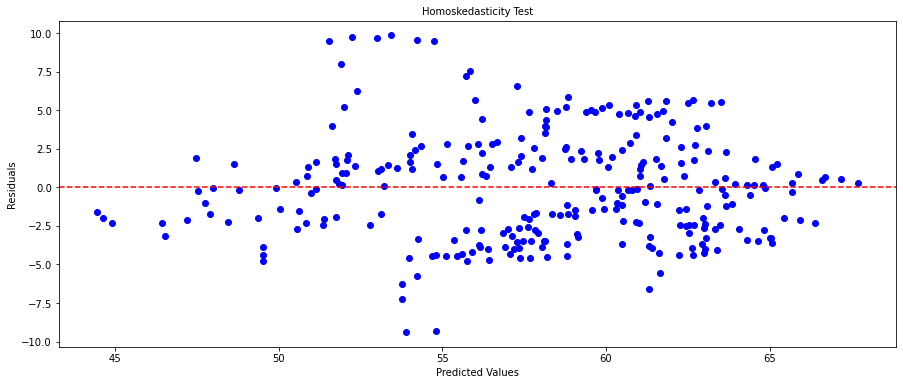

In [27]:
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'b')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 10)
ax.set_ylabel('Residuals', fontsize = 10)
ax.set_title('Homoskedasticity Test', fontsize = 10)
plt.show()

In [28]:
print(pooledOLS_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                      Y   R-squared:                        0.6638
Estimator:                  PooledOLS   R-squared (Between):              0.6684
No. Observations:                 285   R-squared (Within):               0.6500
Date:                Fri, Apr 21 2023   R-squared (Overall):              0.6638
Time:                        02:40:33   Log-likelihood                   -759.38
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      78.140
Entities:                          19   P-value                           0.0000
Avg Obs:                       15.000   Distribution:                   F(7,277)
Min Obs:                       15.000                                           
Max Obs:                       15.000   F-statistic (robust):             34.400
                            

In [29]:
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([pdf, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year'], axis = 1).fillna(0)
#exog = sm.tools.tools.add_constant(dataset['income']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], X)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

{'LM-Stat': 180.8199786214924, 'LM p-val': 1.4675901304390314e-21, 'F-Stat': 12.34790484531152, 'F p-val': 3.0158471653341463e-37}


In [30]:
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], X)

print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 54.816254116626475, 'LM p-val': 1.6212552500564528e-09, 'F-Stat': 9.42359103595613, 'F p-val': 1.7379931209131092e-10}


In [ ]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

In [ ]:
sm.stats.acorr_ljungbox(pooled_OLS_dataset['residual'], return_df=True)

In [ ]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
# random effects model
model_re = RandomEffects(Y, X) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(Y, X, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)


In [ ]:
print(fe_res)

In [ ]:
import numpy.linalg as la
from scipy import stats
import numpy as np

def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))

    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [ ]:
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared:' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

In [ ]:
fe_res.params

In [ ]:
print(type(fe_res.params))

In [ ]:
corr_matrix = pdf[['Undernourishment','log_CO2','Health','Educ','Unemployment','Corruption','log_Communicable']].corr()
sn.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix of Independent Variables", size = 15)
plt.show()

In [ ]:
ax = sn.heatmap(corr_matrix, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [ ]:
!jt -t grade3 -dfs 13 -ofs 13 -tfs 17 -cellw 100%